<a href="https://colab.research.google.com/github/shreyas822/Machine-Learning/blob/master/H1B%20Visa%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 12 - H1B Visa Petitions Decision Prediction


## Team 29

*   Shreyas Venishetty

      *   MVSR Engineering College
      *   shreyas66vs@gmail.com



##Importing the libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import plot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive",force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d nsharan/h-1b-visa

 98% 93.0M/94.8M [00:01<00:00, 73.7MB/s]
100% 94.8M/94.8M [00:01<00:00, 70.1MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  h-1b-visa.zip
replace h1b_kaggle.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: h1b_kaggle.csv          


### Import the data and load it into a pandas dataframe for further cleaning and Analysis

In [ ]:
df=pd.read_csv("h1b_kaggle.csv")
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [ ]:
## Imports for different type of classfiers
from sklearn import tree # <- Decision- Trees
from sklearn import svm # <- Support Vector Machines
import sklearn.linear_model as linear_model # <- Logisitic Regression - Sigmoid Function on the Linear Regression
from sklearn.ensemble import RandomForestClassifier # <- Random Forest Classifier
from sklearn.neural_network import MLPClassifier # <- Neural Networks
from sklearn.naive_bayes import GaussianNB # <- Gaussian Naive-Bayes Classifier

## Imports for recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

## Imports for splitting the data into training and test data
from sklearn.model_selection import train_test_split

## Imports for evaluating the different classifier models selected
import sklearn.metrics as metrics
from sklearn import preprocessing

## Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pd.set_option('display.max_colwidth', -1)
pd.options.mode.chained_assignment = None

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


##Case Status v/s Number of Petitions of the visa petition

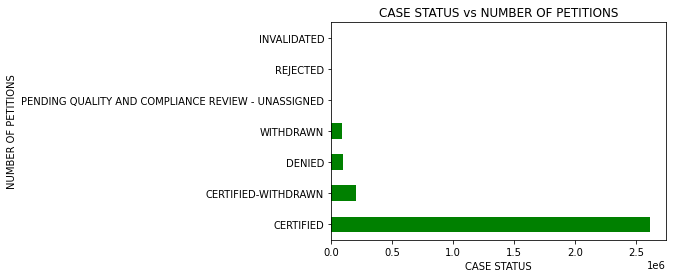

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                   202659 
DENIED                                                94346  
WITHDRAWN                                             89799  
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED    15     
REJECTED                                              2      
INVALIDATED                                           1      
Name: CASE_STATUS, dtype: int64


In [ ]:
plot_status_numberinit = df['CASE_STATUS'].value_counts().plot(title = 'CASE STATUS vs NUMBER OF PETITIONS', \
                                                                kind = 'barh', color = 'green')
plot_status_numberinit.set_xlabel("CASE STATUS")
plot_status_numberinit.set_ylabel("NUMBER OF PETITIONS")
plt.show()
print(df['CASE_STATUS'].value_counts())

### Row Counts v/s Case Status of the visa petition

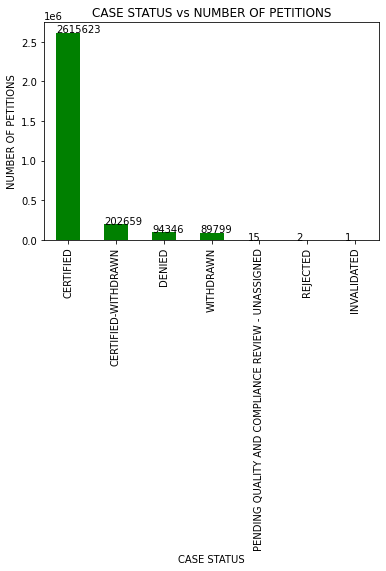

In [ ]:
plot_status_number = df['CASE_STATUS'].value_counts().plot(title = 'CASE STATUS vs NUMBER OF PETITIONS', \
                                                                kind = 'bar', color = 'green')
plot_status_number.set_xlabel("CASE STATUS")
plot_status_number.set_ylabel("NUMBER OF PETITIONS")
for p in plot_status_number.patches:
    plot_status_number.annotate(str(p.get_height()), (p.get_x() * 1.0050, p.get_height() * 1.005))
plot_status_number

### The top 15 employers filing the H1-B visa petitions 

INFOSYS LIMITED                                    130592
TATA CONSULTANCY SERVICES LIMITED                  64726 
WIPRO LIMITED                                      48117 
DELOITTE CONSULTING LLP                            36742 
IBM INDIA PRIVATE LIMITED                          34219 
ACCENTURE LLP                                      33447 
MICROSOFT CORPORATION                              25576 
HCL AMERICA, INC.                                  22678 
ERNST & YOUNG U.S. LLP                             18232 
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION    17528 
LARSEN & TOUBRO INFOTECH LIMITED                   17457 
CAPGEMINI AMERICA INC                              16725 
GOOGLE INC.                                        16473 
IBM CORPORATION                                    13276 
IGATE TECHNOLOGIES INC.                            12564 
Name: EMPLOYER_NAME, dtype: int64


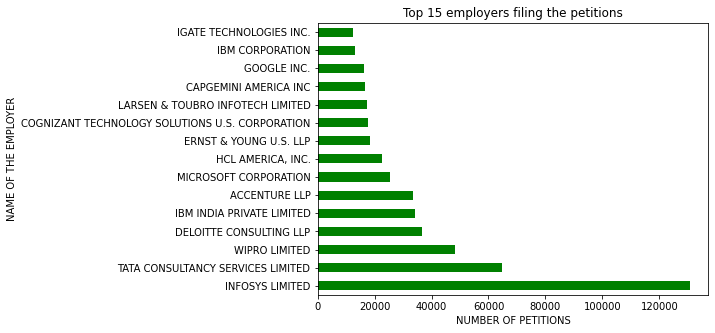

In [ ]:
plot_status_topemp= df['EMPLOYER_NAME'].value_counts().head(15).plot.barh(title = "Top 15 employers filing the petitions", \
                                                                 color = 'green', figsize = (7, 5))
plot_status_topemp.set_ylabel("NAME OF THE EMPLOYER")
plot_status_topemp.set_xlabel("NUMBER OF PETITIONS")
plot_status_topemp
print(df['EMPLOYER_NAME'].value_counts().head(15))

### The top 15 SOC names for which H1-B visas are raised

Computer Systems Analysts                    291170
Computer Programmers                         226574
SOFTWARE DEVELOPERS, APPLICATIONS            221783
COMPUTER SYSTEMS ANALYSTS                    215353
Software Developers, Applications            192933
COMPUTER PROGRAMMERS                         171972
COMPUTER OCCUPATIONS, ALL OTHER              108555
Computer Occupations, All Other              69315 
Software Developers, Systems Software        44500 
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE        39356 
Management Analysts                          38756 
Financial Analysts                           34141 
Computer Software Engineers, Applications    33325 
Accountants and Auditors                     30708 
MANAGEMENT ANALYSTS                          28117 
Name: SOC_NAME, dtype: int64


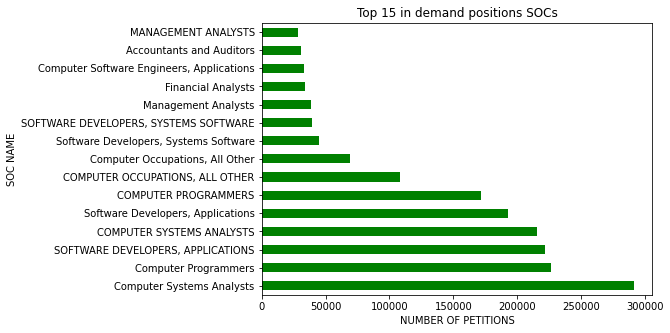

In [ ]:
plot_status_topsoc= df['SOC_NAME'].value_counts().head(15).plot.barh(title = "Top 15 in demand positions SOCs", \
                                                                 color = 'green', figsize = (7, 5))
plot_status_topsoc.set_ylabel("SOC NAME")
plot_status_topsoc.set_xlabel("NUMBER OF PETITIONS")
plot_status_topsoc
print(df['SOC_NAME'].value_counts().head(15))

### Salaries trend per year 

In [ ]:
dfplot_status_fyear = pd.DataFrame(df['YEAR'].value_counts())
dfplot_status_fyear = dfplot_status_fyear.sort_values(['YEAR'])
plot_status_fyear = dfplot_status_fyear.plot(title = 'H1-B Petitions per year', kind = 'line')
plot_status_fyear.set_xlabel('YEAR')
plot_status_fyear.set_ylabel('NUMBER OF PETITIONS')
plt.show()

dfstatus_acceptance_peryear = pd.DataFrame(df[df['CASE_STATUS'] == 'CERTIFIED'].YEAR.value_counts() / df.YEAR.value_counts())
dfstatus_acceptance_peryear = dfstatus_acceptance_peryear.sort_values(['YEAR'])
status_acceptance_peryear = dfstatus_acceptance_peryear.plot(title = 'H1-B Petitions acceptance per year', kind = 'line')
status_acceptance_peryear.set_xlabel('YEAR')
status_acceptance_peryear.set_ylabel('ACCEPTANCE RATIO')
plt.show()

NameError: ignored

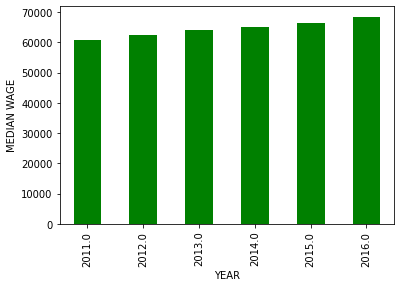

,PREVAILING_WAGE
,median
YEAR,
2011.0,60882.0
2012.0,62462.0
2013.0,63939.0
2014.0,64958.0
2015.0,66394.0
2016.0,68411.0


In [ ]:
dfsalaries_trends_year = df.loc[:,['PREVAILING_WAGE', 'YEAR']].groupby(['YEAR']).agg(['median'])

plot_salaries_trends_year = dfsalaries_trends_year.plot(kind = 'bar', color = 'g', legend = None)
plot_salaries_trends_year.set_xlabel('YEAR')
plot_salaries_trends_year.set_ylabel('MEDIAN WAGE')
plt.show()
dfsalaries_trends_year



 # Features Creation and Categorisation

In [ ]:
print(df['CASE_STATUS'].unique())
df = df.loc[df['CASE_STATUS'].isin(["CERTIFIED", "DENIED"])]

['CERTIFIED-WITHDRAWN' 'WITHDRAWN' 'CERTIFIED' 'DENIED' 'REJECTED'
 'INVALIDATED' 'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED' nan]


###  Remove rows with null values for EMPLOYER_NAME, SOC_NAME, JOB_TITLE, FULL_TIME_POSITION, PREVAILING_WAGE

In [ ]:
df.isnull().sum(axis = 0)

Unnamed: 0            0    
CASE_STATUS           0    
EMPLOYER_NAME         18   
SOC_NAME              15893
JOB_TITLE             10   
FULL_TIME_POSITION    1    
PREVAILING_WAGE       53   
YEAR                  0    
WORKSITE              0    
lon                   97071
lat                   97071
dtype: int64

In [ ]:
df1 = df.dropna(axis=0, how='any', subset = ['EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE', 
                                                      'FULL_TIME_POSITION', 'PREVAILING_WAGE'])

###Find the number of certified and denied of all the needed columns with their count

In [ ]:
print(df.shape)
print(df1.shape)

(2709969, 11)
(2694002, 11)


In [ ]:
df1.CASE_STATUS.value_counts()

CERTIFIED    2600241
DENIED       93761  
Name: CASE_STATUS, dtype: int64

###Downsampling the Data to match the ratio of certified and denied samples

In [ ]:
table_temp_2_Dx = df1[df1['CASE_STATUS'] == 'DENIED']


In [ ]:
table_temp_2_Cx = df1[df1['CASE_STATUS'] == 'CERTIFIED']


In [ ]:
Input_Certified, Input_Certified_extra, y_certified, y_certified_extra = train_test_split(df1[df1.CASE_STATUS == 'CERTIFIED'],\
                                                                                          table_temp_2_Cx.CASE_STATUS, train_size= 0.06, random_state=1)

In [ ]:
training_dataframe = Input_Certified.append(table_temp_2_Dx)

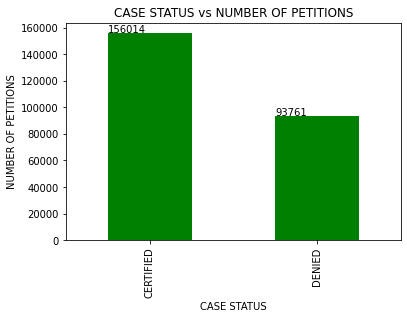

In [ ]:
## plot the distribution of the certified and denied samples after downsampling
plot_after_ds = training_dataframe['CASE_STATUS'].value_counts().plot(title = 'CASE STATUS vs NUMBER OF PETITIONS', \
                                                                kind = 'bar', color = 'green')
plot_after_ds.set_xlabel("CASE STATUS")
plot_after_ds.set_ylabel("NUMBER OF PETITIONS")
for p in plot_after_ds.patches:
    plot_after_ds.annotate(str(p.get_height()), (p.get_x() * 1.0050, p.get_height() * 1.005))
plt.show()

 # Features Creation and Categorisation

For the given categorical data, they need to convert it to numerical values

There are three ways to convert the categorical data to numerical ones.

1. Encoding to ordinal values
2. Feature Hashing
3. One-Hot Encoding

Prior selecting any of the above methods, it is necessary to get the details of the unique values for each of the columns/Features. Below is the plot for the same.

In [ ]:
# one-hot encoding for every possible and needed column
print("Case Status ",training_dataframe.CASE_STATUS.nunique())
print("Unique Employers ",training_dataframe.EMPLOYER_NAME.nunique())
print("Prevailing Wages ",training_dataframe.PREVAILING_WAGE.nunique())
print("Unique SOCs ", training_dataframe.SOC_NAME.nunique())
print("Unique Job Titles ",training_dataframe.JOB_TITLE.nunique())
print("Unique Filing Year ",training_dataframe.YEAR.nunique())
print("Unique Worksite State ",training_dataframe.WORKSITE.nunique())
print("Unique Employment Type ", training_dataframe.FULL_TIME_POSITION.nunique())

Case Status  2
Unique Employers  80566
Prevailing Wages  24804
Unique SOCs  1435
Unique Job Titles  53272
Unique Filing Year  6
Unique Worksite State  8637
Unique Employment Type  2


### Step 8: Feature Categorisation Functions

In [ ]:
def wage_categorization(wage):
    if wage <=50000:
        return "VERY LOW"
    elif wage >50000 and wage <= 70000:
        return "LOW"
    elif wage >70000 and wage <= 90000:
        return "MEDIUM"
    elif wage >90000 and wage<=150000:
        return "HIGH"
    elif wage >=150000:
        return "VERY HIGH"

In [ ]:
def categorisation_visagrant(ratio_of_acceptance):
    if ratio_of_acceptance == -1:
        return "AR"
    elif ratio_of_acceptance >=0.0 and ratio_of_acceptance<0.20:
        return "VLA"
    elif ratio_of_acceptance>=0.20 and ratio_of_acceptance<0.40:
        return "LA"
    elif ratio_of_acceptance>=0.40 and ratio_of_acceptance<0.60:
        return "MA"
    elif ratio_of_acceptance>=0.60 and ratio_of_acceptance<0.80:
        return "HA"
    elif ratio_of_acceptance>=0.80:
        return "VHA"

In [ ]:
def state_extractor(work_site):
    return work_site.split(', ')[1]

In [ ]:
training_dataframe['WORKSITE'] = training_dataframe['WORKSITE'].apply(state_extractor)

In [ ]:
training_dataframe.WORKSITE.unique()


array(['PENNSYLVANIA', 'TEXAS', 'NEW YORK', 'CALIFORNIA', 'CONNECTICUT',
       'WASHINGTON', 'MISSOURI', 'OREGON', 'VIRGINIA', 'MASSACHUSETTS',
       'OHIO', 'ILLINOIS', 'FLORIDA', 'TENNESSEE', 'IDAHO', 'MARYLAND',
       'GEORGIA', 'NORTH CAROLINA', 'NEBRASKA', 'MINNESOTA', 'DELAWARE',
       'NEW HAMPSHIRE', 'ALABAMA', 'NEW JERSEY', 'WISCONSIN', 'ARIZONA',
       'INDIANA', 'MICHIGAN', 'IOWA', 'COLORADO', 'NEW MEXICO',
       'SOUTH CAROLINA', 'LOUISIANA', 'UTAH', 'KENTUCKY', 'ALASKA',
       'DISTRICT OF COLUMBIA', 'OKLAHOMA', 'ARKANSAS', 'RHODE ISLAND',
       'VERMONT', 'MAINE', 'MISSISSIPPI', 'NA', 'KANSAS', 'NEVADA',
       'HAWAII', 'WYOMING', 'PUERTO RICO', 'WEST VIRGINIA', 'MONTANA',
       'NORTH DAKOTA', 'SOUTH DAKOTA'], dtype=object)

### Step 9: Feature Creation for One-Hot Encoding

In [ ]:
training_dataframe['WAGE_CATEGORY'] = training_dataframe['PREVAILING_WAGE'].apply(wage_categorization)

In [ ]:
training_dataframe_1 = training_dataframe.loc[:,['EMPLOYER_NAME', 'CASE_STATUS']]
training_dataframe_1s = training_dataframe.loc[:,['SOC_NAME', 'CASE_STATUS']]
training_dataframe_1j = training_dataframe.loc[:,['JOB_TITLE', 'CASE_STATUS']]


In [ ]:
training_dataframe_2_C = training_dataframe_1[training_dataframe_1.CASE_STATUS == 'CERTIFIED'].EMPLOYER_NAME
training_dataframe_2_Cs = training_dataframe_1s[training_dataframe_1s.CASE_STATUS == 'CERTIFIED'].SOC_NAME
training_dataframe_2_Cj = training_dataframe_1j[training_dataframe_1j.CASE_STATUS == 'CERTIFIED'].JOB_TITLE
positive_counts = training_dataframe_2_C.value_counts()
positive_counts_s = training_dataframe_2_Cs.value_counts()
positive_counts_j = training_dataframe_2_Cj.value_counts()

In [ ]:
total_counts = training_dataframe_1.EMPLOYER_NAME.value_counts()
total_counts_s = training_dataframe_1s.SOC_NAME.value_counts()
total_counts_j = training_dataframe_1j.JOB_TITLE.value_counts()


In [ ]:
final_ratio_series = positive_counts / total_counts

final_ratio_series.fillna(-1, inplace=True)
final_classification_employer = final_ratio_series.apply(categorisation_visagrant)
training_dataframe['EMPLOYER_ACCEPTANCE'] = training_dataframe.EMPLOYER_NAME.map(final_classification_employer)

In [ ]:
final_ratio_series_s = positive_counts_s / total_counts_s
final_ratio_series_s.fillna(-1, inplace=True)
final_classification_soc = final_ratio_series_s.apply(categorisation_visagrant)
training_dataframe['SOC_ACCEPTANCE'] = training_dataframe.SOC_NAME.map(final_classification_soc)

In [ ]:
final_ratio_series_j = positive_counts_j / total_counts_j
final_ratio_series_j.fillna(-1, inplace=True)
final_classification_job = final_ratio_series_j.apply(categorisation_visagrant)
training_dataframe['JOB_ACCEPTANCE'] = training_dataframe.JOB_TITLE.map(final_classification_job)

In [ ]:
print("Case Status ",training_dataframe.CASE_STATUS.nunique())
print("Unique Employers ",training_dataframe.EMPLOYER_ACCEPTANCE.nunique())
print("Wages Category", training_dataframe.WAGE_CATEGORY.nunique())
print("Unique SOCs ", training_dataframe.SOC_ACCEPTANCE.nunique())
print("Unique Job Titles ",training_dataframe.JOB_ACCEPTANCE.nunique())
print("Unique Filing Year ",training_dataframe.YEAR.nunique())
print("Unique Worksite State ",training_dataframe.WORKSITE.nunique())
print("Unique Employment Type ", training_dataframe.FULL_TIME_POSITION.nunique())

Case Status  2
Unique Employers  6
Wages Category 5
Unique SOCs  6
Unique Job Titles  6
Unique Filing Year  6
Unique Worksite State  53
Unique Employment Type  2


In [ ]:
dict_cs = {"CERTIFIED" : 1, "DENIED": 0}
dict_fp = {"Y" : 1, "N" : 0}
try:
    
    training_dataframe['CASE_STATUS'] = training_dataframe['CASE_STATUS'].apply(lambda x: dict_cs[x])
    training_dataframe['FULL_TIME_POSITION'] = training_dataframe['FULL_TIME_POSITION'].apply(lambda x: dict_fp[x])
except:
    pass

In [ ]:
training_dataframe['YEAR'] = training_dataframe['YEAR'].astype('int')
training_dataframe.sort_index(inplace = True)
training_dataframe = training_dataframe.loc[:, ['CASE_STATUS', 'YEAR',\
                                                'WORKSITE', 'WAGE_CATEGORY',  'EMPLOYER_ACCEPTANCE', 'JOB_ACCEPTANCE', 'SOC_ACCEPTANCE', 'FULL_TIME_POSITION']]
training_dataframe.head()

,CASE_STATUS,YEAR,WORKSITE,WAGE_CATEGORY,EMPLOYER_ACCEPTANCE,JOB_ACCEPTANCE,SOC_ACCEPTANCE,FULL_TIME_POSITION
39,0,2016,WASHINGTON,VERY HIGH,AR,LA,MA,1
47,0,2016,CALIFORNIA,VERY HIGH,AR,LA,MA,1
66,1,2016,GEORGIA,VERY HIGH,VHA,LA,MA,1
70,1,2016,PENNSYLVANIA,VERY HIGH,VHA,LA,MA,1
91,0,2016,MICHIGAN,HIGH,AR,VLA,MA,1


### Step 10: Apply One-hot encoding

In [ ]:
final_df_train = pd.get_dummies(training_dataframe, columns=['YEAR', 'WORKSITE', 'FULL_TIME_POSITION', 'WAGE_CATEGORY', 'EMPLOYER_ACCEPTANCE',
                                                             
                                                                'JOB_ACCEPTANCE', 'SOC_ACCEPTANCE' ], drop_first=True)
final_df_train.head()


#Step 11 is not executing here due to iteration number

,CASE_STATUS,YEAR_2012,YEAR_2013,YEAR_2014,YEAR_2015,YEAR_2016,WORKSITE_ALASKA,WORKSITE_ARIZONA,WORKSITE_ARKANSAS,WORKSITE_CALIFORNIA,WORKSITE_COLORADO,WORKSITE_CONNECTICUT,WORKSITE_DELAWARE,WORKSITE_DISTRICT OF COLUMBIA,WORKSITE_FLORIDA,WORKSITE_GEORGIA,WORKSITE_HAWAII,WORKSITE_IDAHO,WORKSITE_ILLINOIS,WORKSITE_INDIANA,WORKSITE_IOWA,WORKSITE_KANSAS,WORKSITE_KENTUCKY,WORKSITE_LOUISIANA,WORKSITE_MAINE,WORKSITE_MARYLAND,WORKSITE_MASSACHUSETTS,WORKSITE_MICHIGAN,WORKSITE_MINNESOTA,WORKSITE_MISSISSIPPI,WORKSITE_MISSOURI,WORKSITE_MONTANA,WORKSITE_NA,WORKSITE_NEBRASKA,WORKSITE_NEVADA,WORKSITE_NEW HAMPSHIRE,WORKSITE_NEW JERSEY,WORKSITE_NEW MEXICO,WORKSITE_NEW YORK,WORKSITE_NORTH CAROLINA,WORKSITE_NORTH DAKOTA,WORKSITE_OHIO,WORKSITE_OKLAHOMA,WORKSITE_OREGON,WORKSITE_PENNSYLVANIA,WORKSITE_PUERTO RICO,WORKSITE_RHODE ISLAND,WORKSITE_SOUTH CAROLINA,WORKSITE_SOUTH DAKOTA,WORKSITE_TENNESSEE,WORKSITE_TEXAS,WORKSITE_UTAH,WORKSITE_VERMONT,WORKSITE_VIRGINIA,WORKSITE_WASHINGTON,WORKSITE_WEST VIRGINIA,WORKSITE_WISCONSIN,WORKSITE_WYOMING,FULL_TIME_POSITION_1,WAGE_CATEGORY_LOW,WAGE_CATEGORY_MEDIUM,WAGE_CATEGORY_VERY HIGH,WAGE_CATEGORY_VERY LOW,EMPLOYER_ACCEPTANCE_HA,EMPLOYER_ACCEPTANCE_LA,EMPLOYER_ACCEPTANCE_MA,EMPLOYER_ACCEPTANCE_VHA,EMPLOYER_ACCEPTANCE_VLA,JOB_ACCEPTANCE_HA,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA
39,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
47,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
66,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
70,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_df_train.iloc[:,1:], final_df_train.iloc[:, 0], test_size = 0.20, random_state=1)
#y_train[y_train==1].shape
y_test[y_test==1].shape


(31200,)

In [ ]:
X_train.head()

,YEAR_2012,YEAR_2013,YEAR_2014,YEAR_2015,YEAR_2016,WORKSITE_ALASKA,WORKSITE_ARIZONA,WORKSITE_ARKANSAS,WORKSITE_CALIFORNIA,WORKSITE_COLORADO,WORKSITE_CONNECTICUT,WORKSITE_DELAWARE,WORKSITE_DISTRICT OF COLUMBIA,WORKSITE_FLORIDA,WORKSITE_GEORGIA,WORKSITE_HAWAII,WORKSITE_IDAHO,WORKSITE_ILLINOIS,WORKSITE_INDIANA,WORKSITE_IOWA,WORKSITE_KANSAS,WORKSITE_KENTUCKY,WORKSITE_LOUISIANA,WORKSITE_MAINE,WORKSITE_MARYLAND,WORKSITE_MASSACHUSETTS,WORKSITE_MICHIGAN,WORKSITE_MINNESOTA,WORKSITE_MISSISSIPPI,WORKSITE_MISSOURI,WORKSITE_MONTANA,WORKSITE_NA,WORKSITE_NEBRASKA,WORKSITE_NEVADA,WORKSITE_NEW HAMPSHIRE,WORKSITE_NEW JERSEY,WORKSITE_NEW MEXICO,WORKSITE_NEW YORK,WORKSITE_NORTH CAROLINA,WORKSITE_NORTH DAKOTA,WORKSITE_OHIO,WORKSITE_OKLAHOMA,WORKSITE_OREGON,WORKSITE_PENNSYLVANIA,WORKSITE_PUERTO RICO,WORKSITE_RHODE ISLAND,WORKSITE_SOUTH CAROLINA,WORKSITE_SOUTH DAKOTA,WORKSITE_TENNESSEE,WORKSITE_TEXAS,WORKSITE_UTAH,WORKSITE_VERMONT,WORKSITE_VIRGINIA,WORKSITE_WASHINGTON,WORKSITE_WEST VIRGINIA,WORKSITE_WISCONSIN,WORKSITE_WYOMING,FULL_TIME_POSITION_1,WAGE_CATEGORY_LOW,WAGE_CATEGORY_MEDIUM,WAGE_CATEGORY_VERY HIGH,WAGE_CATEGORY_VERY LOW,EMPLOYER_ACCEPTANCE_HA,EMPLOYER_ACCEPTANCE_LA,EMPLOYER_ACCEPTANCE_MA,EMPLOYER_ACCEPTANCE_VHA,EMPLOYER_ACCEPTANCE_VLA,JOB_ACCEPTANCE_HA,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA
363034,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2794144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
2298633,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
256430,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
2924319,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0


# Training classifiers

## Decision Tree Model

In [ ]:
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

In [ ]:
y_pred = dtree.predict(X_test)

y_prob = dtree.predict_proba(X_test)

print("test", y_test[:10])
print("pred", y_pred[:10])
print()

print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))
#print(metrics.precision_score(y_test,y_pred))   # Parameter "average" is requred if not a binary model
#print(metrics.recall_score(y_test,y_pred))      # Parameter "average" is requred if not a binary model
#print(metrics.f1_score(y_test,y_pred)) 

test 1069287    1
608355     0
873557     1
2063899    0
879488     1
2280957    1
564762     0
2784493    1
2531141    1
718033     0
Name: CASE_STATUS, dtype: int64
pred [1 0 1 0 1 1 0 1 1 1]

[[14891  3864]
 [ 2305 28895]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83     18755
           1       0.88      0.93      0.90     31200

    accuracy                           0.88     49955
   macro avg       0.87      0.86      0.87     49955
weighted avg       0.88      0.88      0.88     49955



## Logistic Regression Model

In [ ]:
lr_clf = linear_model.LogisticRegression()
lr_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_lr = lr_clf.predict(X_test)

probs = lr_clf.predict_proba(X_test)

print("test", y_test[:10])
print("pred", y_pred_lr[:10])

print(metrics.confusion_matrix(y_test,y_pred_lr))
print(metrics.classification_report(y_test, y_pred_lr))
#print(metrics.precision_score(y_test,y_pred))   # Parameter "average" is requred if not a binary model
#print(metrics.recall_score(y_test,y_pred))      # Parameter "average" is requred if not a binary model
#print(metrics.f1_score(y_test,y_pred))

test 1069287    1
608355     0
873557     1
2063899    0
879488     1
2280957    1
564762     0
2784493    1
2531141    1
718033     0
Name: CASE_STATUS, dtype: int64
pred [1 0 1 0 1 1 0 1 1 1]
[[14558  4197]
 [ 1237 29963]]
              precision    recall  f1-score   support

           0       0.92      0.78      0.84     18755
           1       0.88      0.96      0.92     31200

    accuracy                           0.89     49955
   macro avg       0.90      0.87      0.88     49955
weighted avg       0.89      0.89      0.89     49955



## Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(n_estimators = 75, random_state = 50)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_rf =  rf.predict(X_test)
probs = rf.predict_proba(X_test)

print("test", y_test[:10])
print("pred", y_pred[:10])
print(metrics.confusion_matrix(y_test,y_pred_rf))
print(metrics.classification_report(y_test, y_pred_rf))
#print(metrics.precision_score(y_test,y_pred_rf))   # Parameter "average" is requred if not a binary model
#print(metrics.recall_score(y_test,y_pred))
#print(metrics.f1_score(y_test, y_pred))# Parameter "average" is requred if not a binary model

test 1069287    1
608355     0
873557     1
2063899    0
879488     1
2280957    1
564762     0
2784493    1
2531141    1
718033     0
Name: CASE_STATUS, dtype: int64
pred [1 0 1 0 1 1 0 1 1 1]
[[14740  4015]
 [ 1928 29272]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83     18755
           1       0.88      0.94      0.91     31200

    accuracy                           0.88     49955
   macro avg       0.88      0.86      0.87     49955
weighted avg       0.88      0.88      0.88     49955



## Artificial Neural Networks

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(20,20,20,20,20), max_iter=1000)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20, 20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred_mlp = mlp.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred_mlp)
print(confusion)
print(metrics.classification_report(y_test, y_pred_mlp))

[[14673  4082]
 [ 1372 29828]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84     18755
           1       0.88      0.96      0.92     31200

    accuracy                           0.89     49955
   macro avg       0.90      0.87      0.88     49955
weighted avg       0.89      0.89      0.89     49955



## Gaussian Naive Bayes Classifier

In [ ]:
gaus_clf = GaussianNB()
gaus_clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_glb = gaus_clf.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred_glb)
print(confusion)
print(metrics.classification_report(y_test, y_pred_glb))

[[ 7770 10985]
 [ 2574 28626]]
              precision    recall  f1-score   support

           0       0.75      0.41      0.53     18755
           1       0.72      0.92      0.81     31200

    accuracy                           0.73     49955
   macro avg       0.74      0.67      0.67     49955
weighted avg       0.73      0.73      0.71     49955

